In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import geopandas as gpd

In [6]:
income_2016_path = r'./Data/income/2016_renda_neta_mitjana_per_persona.csv'
income_2017_path = r'./Data/income/2017_renda_neta_mitjana_per_persona.csv'
income_2018_path = r'./Data/income/2018_renda_neta_mitjana_per_persona.csv'
income_2019_path = r'./Data/income/2019_renda_neta_mitjana_per_persona.csv'
income_2020_path = r'./Data/income/2020_renda_neta_mitjana_per_persona.csv'

# Import of the files using pandas
# Import income data
income_2016 = pd.read_csv(income_2016_path)
income_2017 = pd.read_csv(income_2017_path)
income_2018 = pd.read_csv(income_2018_path)
income_2019 = pd.read_csv(income_2019_path)
income_2020 = pd.read_csv(income_2020_path)

#Solving dataframe issues
income_2016.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2017.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2018.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2020['Nom_Districte']=income_2020['Nom_Districte'].replace('L\'Eixample','Eixample')

In [7]:
incomearray=[income_2016,income_2017,income_2018,income_2019,income_2020]
income_df=pd.concat(incomearray)
income_df.columns

Index(['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
       'Seccio_Censal', 'Import_Euros'],
      dtype='object')

In [17]:
#We erase the column about secció censal and merge all the rows from the same neighbourhood
income_df.drop('Seccio_Censal', axis=1)
income_df_refined=income_df.groupby('Nom_Districte').agg({'Codi_Districte':'mean','Import_Euros': 'mean'}).reset_index()
income_df_refined['Codi_Districte']=income_df_refined['Codi_Districte'].astype(int)

income_df_refined
# print(euros)

,Nom_Districte,Codi_Districte,Import_Euros
0,Ciutat Vella,1,11150.0
1,Eixample,2,17925.0
2,Gràcia,6,17293.0
3,Horta-Guinardó,7,14683.0
4,Les Corts,4,20516.0
5,Nou Barris,8,11841.0
6,Sant Andreu,9,14860.0
7,Sant Martí,10,14530.0
8,Sants-Montjuïc,3,13912.0
9,Sarrià-Sant Gervasi,5,24243.5


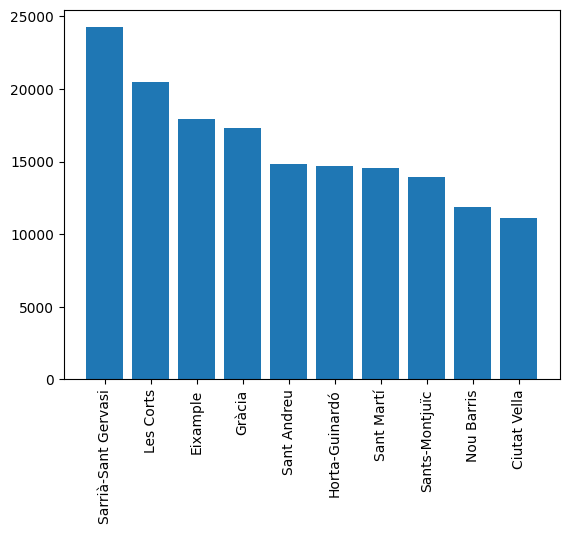

In [18]:
income_df_refinedforbars=income_df_refined.sort_values('Import_Euros',ascending=False)
plt.bar(income_df_refinedforbars['Nom_Districte'], income_df_refinedforbars['Import_Euros'])
plt.xticks(rotation=90)
plt.show()

Ciutat Vella
Eixample
Sants-Montjuïc
Les Corts
Sarrià-Sant Gervasi
Gràcia
Horta-Guinardó
Nou Barris
Sant Andreu
Sant Martí


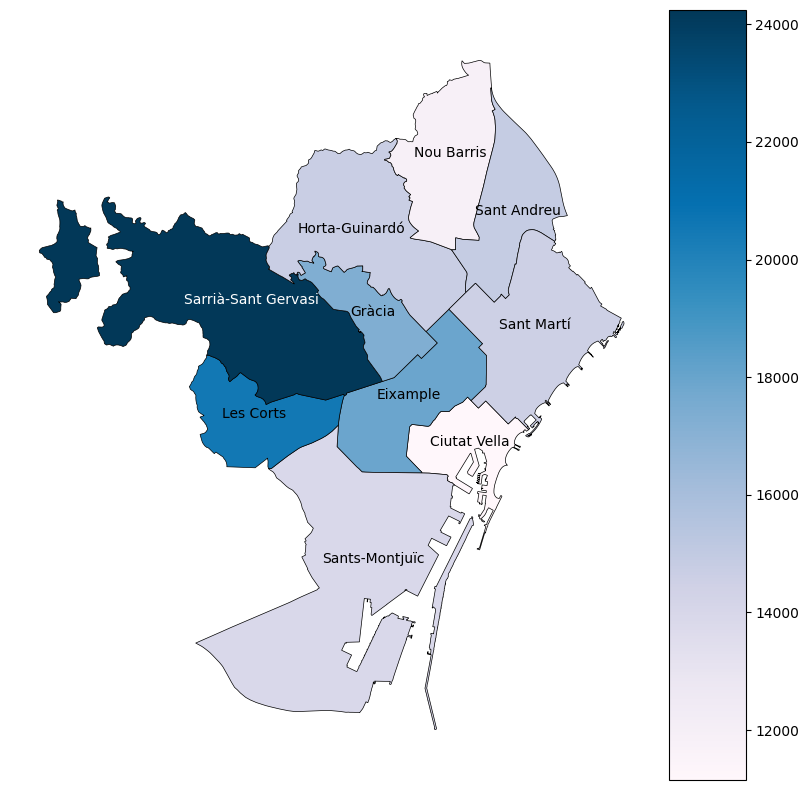

In [34]:
#General map
data_dir = 'Data/'
mapofbarcelonadistricts = gpd.read_file(data_dir + "0301040100_Districtes_UNITATS_ADM.shp") 


mapofbarcelonadistricts["DISTRICTE"]=mapofbarcelonadistricts["DISTRICTE"].astype(int)


mapofbarcelonadistrictswincome=mapofbarcelonadistricts.merge(income_df_refined, left_on='DISTRICTE',right_on='Codi_Districte')

fig, ax = plt.subplots(figsize=(10, 10))
mapofbarcelonadistrictswincome.plot(column='Import_Euros', ax=ax, cmap='PuBu', edgecolor='black', linewidth=0.5)

cbar = plt.colorbar(ax.collections[0], ax=ax, pad=0.02, aspect=10)

for x, y, label in zip(mapofbarcelonadistrictswincome.geometry.centroid.x, mapofbarcelonadistrictswincome.geometry.centroid.y, mapofbarcelonadistrictswincome['Nom_Districte']):
    print(label)
    if label=='Horta-Guinardó':
        ax.annotate(label, xy=(x, y), xytext=(-50, 0), textcoords='offset points')
    elif label=='Gràcia':
        ax.annotate(label, xy=(x, y), xytext=(-15, 0), textcoords='offset points')
    elif label=='Sants-Montjuïc':
        ax.annotate(label, xy=(x, y), xytext=(-15, 15), textcoords='offset points')
    elif label=='Sant Andreu':
        ax.annotate(label, xy=(x, y), xytext=(-25, -5), textcoords='offset points')
    elif label=='Sarrià-Sant Gervasi':
        ax.annotate(label, xy=(x, y), xytext=(-25, 0), textcoords='offset points',color='white')
    else:      
        ax.annotate(label, xy=(x, y), xytext=(-25, 0), textcoords='offset points')

ax.axis('off')

# Show the plot
plt.show()

In [40]:
mapofbarcelonadistrictswincome

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,Nom_Districte,Codi_Districte,Import_Euros
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4...",Ciutat Vella,1,3042368
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4...",Eixample,2,15837285
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833...",Sants-Montjuïc,3,8196178
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4...",Les Corts,4,6074603
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568...",Sarrià-Sant Gervasi,5,12334638
5,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((427826.987 4586145.355, 427836.537 4...",Gràcia,6,7650783
6,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((426501.867 4586067.120, 426510.429 4...",Horta-Guinardó,7,8934190
7,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((429473.834 4588578.601, 429478.179 4...",Nou Barris,8,6968576
8,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432158.516 4590377.238, 432158.904 4...",Sant Andreu,9,6867462
9,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((433770.023 4586475.362, 433737.125 4...",Sant Martí,10,10778702
